In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = '../data/original_data/Data_and_description.xls'

In [3]:
xls = pd.ExcelFile(file_path)

print(xls.sheet_names)

['Description', 'Data', 'Raw Data']


In [4]:
df = xls.parse(xls.sheet_names[2])


In [5]:
df.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0


In [6]:
df.shape

(2129, 40)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 40 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   FileName  2126 non-null   object        
 1   Date      2126 non-null   datetime64[ns]
 2   SegFile   2126 non-null   object        
 3   b         2126 non-null   float64       
 4   e         2126 non-null   float64       
 5   LBE       2126 non-null   float64       
 6   LB        2126 non-null   float64       
 7   AC        2126 non-null   float64       
 8   FM        2127 non-null   float64       
 9   UC        2127 non-null   float64       
 10  ASTV      2127 non-null   float64       
 11  MSTV      2127 non-null   float64       
 12  ALTV      2127 non-null   float64       
 13  MLTV      2127 non-null   float64       
 14  DL        2128 non-null   float64       
 15  DS        2128 non-null   float64       
 16  DP        2128 non-null   float64       
 17  DR        2128

In [8]:
df.isna().sum()

FileName    3
Date        3
SegFile     3
b           3
e           3
LBE         3
LB          3
AC          3
FM          2
UC          2
ASTV        2
MSTV        2
ALTV        2
MLTV        2
DL          1
DS          1
DP          1
DR          1
Width       3
Min         3
Max         3
Nmax        3
Nzeros      3
Mode        3
Mean        3
Median      3
Variance    3
Tendency    3
A           3
B           3
C           3
D           3
E           3
AD          3
DE          3
LD          3
FS          3
SUSP        3
CLASS       3
NSP         3
dtype: int64

In [9]:
null_rows = df[df.isnull().any(axis=1)]
print(null_rows)


     FileName Date SegFile   b   e  LBE  LB  AC     FM    UC  ...   C   D   E  \
2126      NaN  NaT     NaN NaN NaN  NaN NaN NaN    NaN   NaN  ... NaN NaN NaN   
2127      NaN  NaT     NaN NaN NaN  NaN NaN NaN    NaN   NaN  ... NaN NaN NaN   
2128      NaN  NaT     NaN NaN NaN  NaN NaN NaN  564.0  23.0  ... NaN NaN NaN   

      AD  DE  LD  FS  SUSP  CLASS  NSP  
2126 NaN NaN NaN NaN   NaN    NaN  NaN  
2127 NaN NaN NaN NaN   NaN    NaN  NaN  
2128 NaN NaN NaN NaN   NaN    NaN  NaN  

[3 rows x 40 columns]


In [16]:
data_clean = df.copy()

In [17]:
data_clean.dropna()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
1,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
2,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0005.txt,533.0,1147.0,132.0,132.0,4.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,S8001045.dsp,1998-06-06,CTG2124.txt,2059.0,2867.0,140.0,140.0,0.0,0.0,6.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2122,S8001045.dsp,1998-06-06,CTG2125.txt,1576.0,2867.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2123,S8001045.dsp,1998-06-06,CTG2126.txt,1576.0,2596.0,140.0,140.0,1.0,0.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0
2124,S8001045.dsp,1998-06-06,CTG2127.txt,1576.0,3049.0,140.0,140.0,1.0,0.0,9.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0


In [18]:
data_clean[['b','e','LBE']].describe()


,b,e,LBE
count,2126.000000,2126.000000,2126.000000
mean,878.439793,1702.877234,133.303857
std,894.084748,930.919143,9.840844
min,0.000000,287.000000,106.000000
25%,55.000000,1009.000000,126.000000
50%,538.000000,1241.000000,133.000000
75%,1521.000000,2434.750000,140.000000
max,3296.000000,3599.000000,160.000000


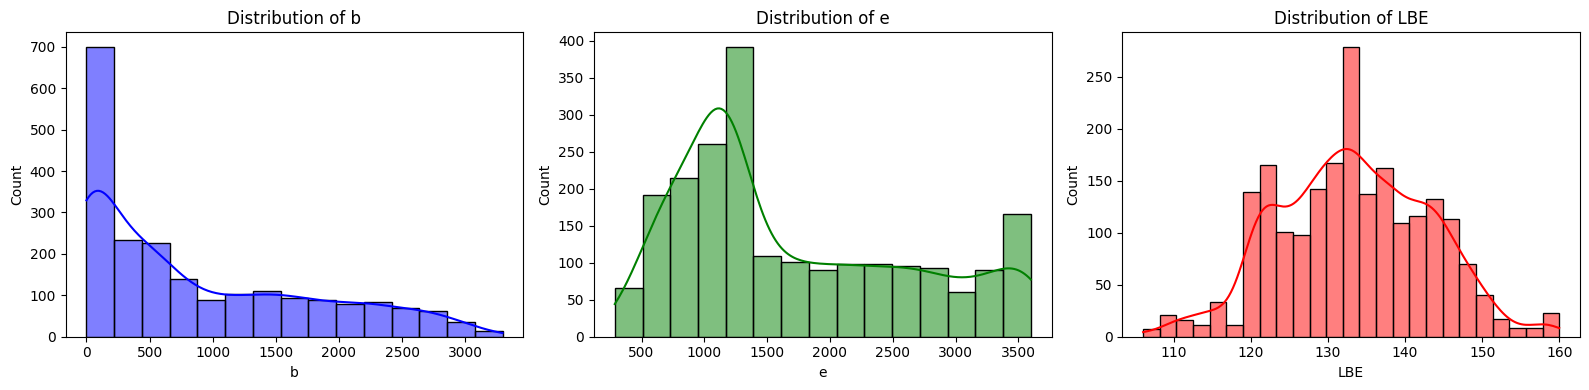

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(16,4))
sns.histplot(data_clean['b'], kde=True, ax=axes[0], color='blue')
axes[0].set_title('Distribution of b')

sns.histplot(data_clean['e'], kde=True, ax=axes[1], color='green')
axes[1].set_title('Distribution of e')

sns.histplot(data_clean['LBE'], kde=True, ax=axes[2], color='red')
axes[2].set_title('Distribution of LBE')

plt.tight_layout()
plt.show()


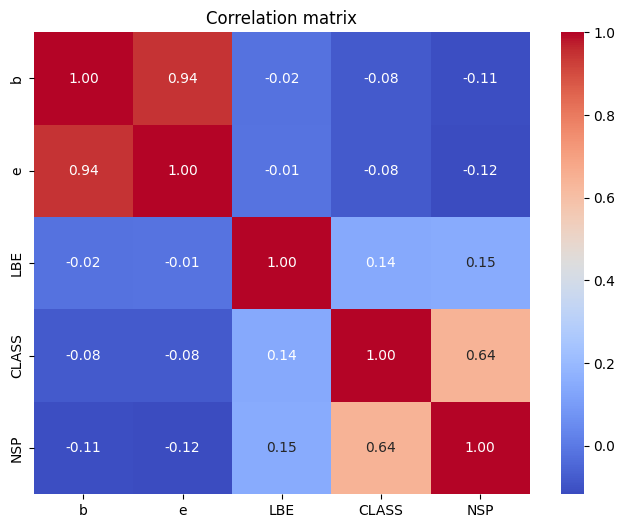

In [22]:
cols = ['b','e','LBE','CLASS','NSP']  
corr = data_clean[cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation matrix")
plt.show()

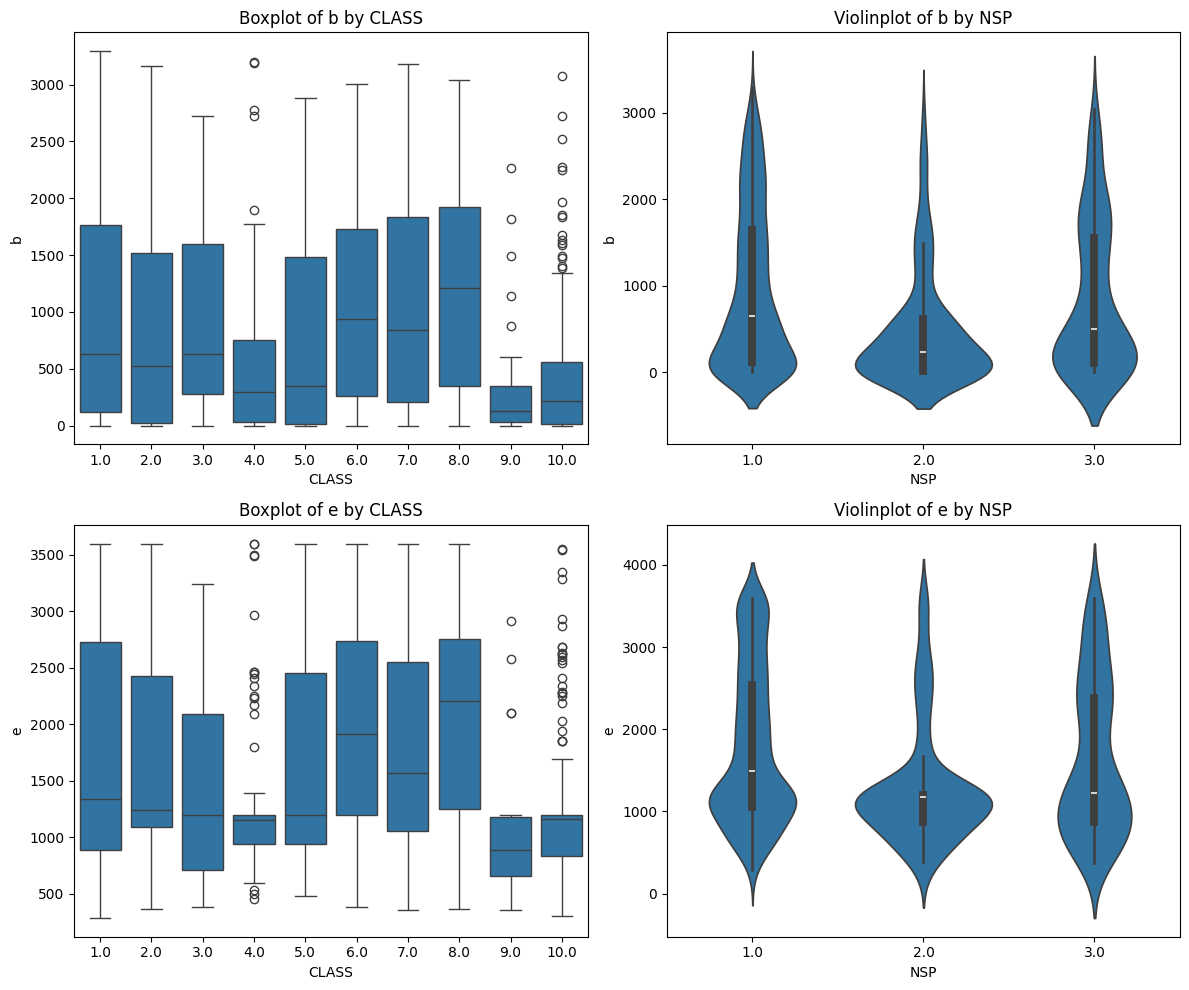

In [24]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))

sns.boxplot(x='CLASS', y='b', data=data_clean, ax=axes[0,0])
axes[0,0].set_title('Boxplot of b by CLASS')

sns.violinplot(x='NSP', y='b', data=data_clean, ax=axes[0,1])
axes[0,1].set_title('Violinplot of b by NSP')

sns.boxplot(x='CLASS', y='e', data=data_clean, ax=axes[1,0])
axes[1,0].set_title('Boxplot of e by CLASS')

sns.violinplot(x='NSP', y='e', data=data_clean, ax=axes[1,1])
axes[1,1].set_title('Violinplot of e by NSP')

plt.tight_layout()
plt.show()

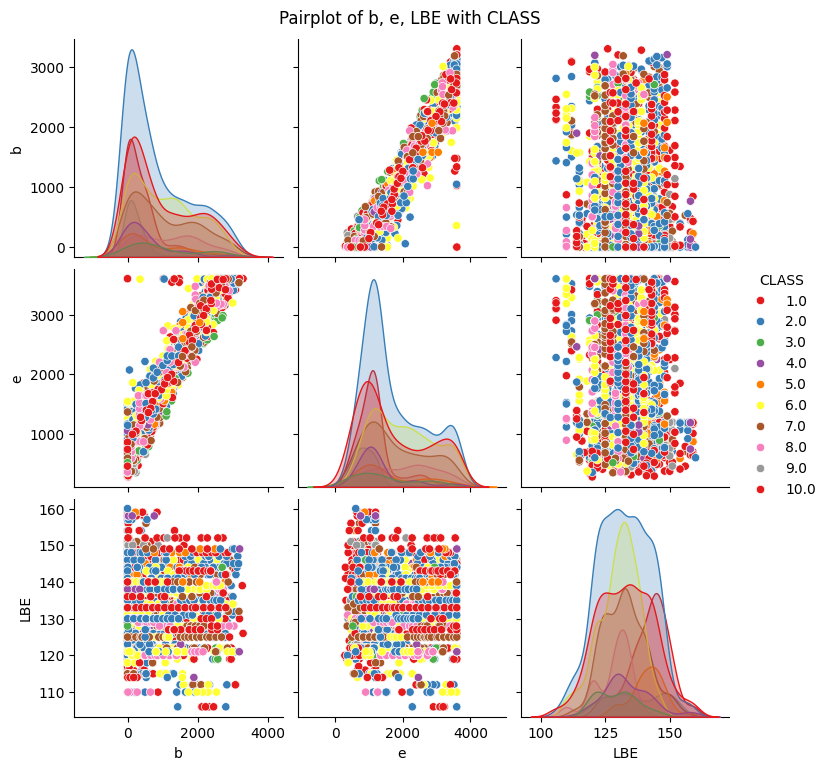

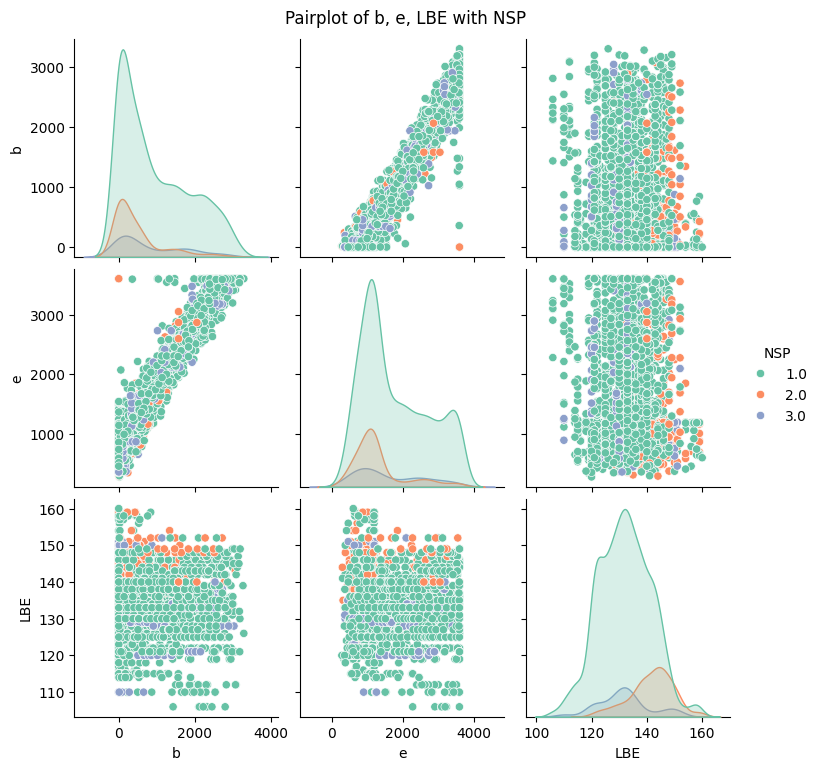

In [26]:
sns.pairplot(data_clean, vars=['b','e','LBE'], hue='CLASS', palette='Set1', diag_kind='kde')
plt.suptitle('Pairplot of b, e, LBE with CLASS', y=1.02)
plt.show()

sns.pairplot(data_clean, vars=['b','e','LBE'], hue='NSP', palette='Set2', diag_kind='kde')
plt.suptitle('Pairplot of b, e, LBE with NSP', y=1.02)
plt.show()

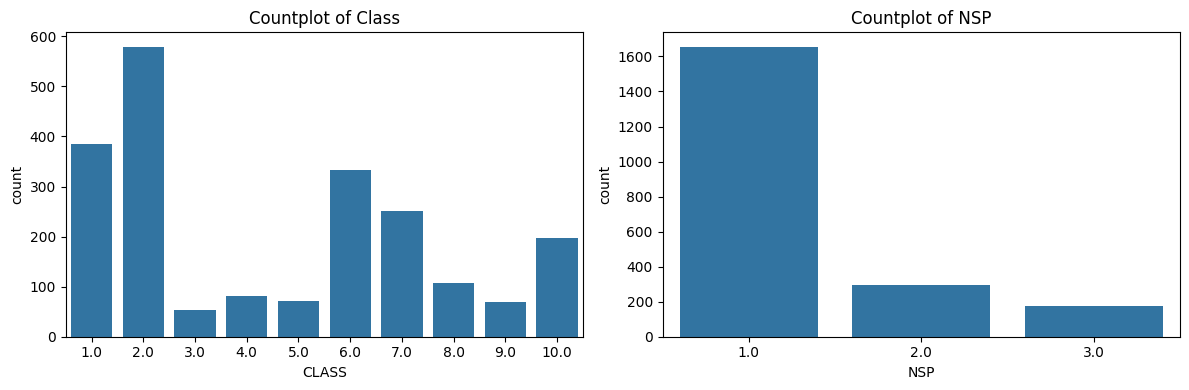

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sns.countplot(x='CLASS', data=data_clean, ax=axes[0])
axes[0].set_title('Countplot of Class')
sns.countplot(x='NSP', data=data_clean, ax=axes[1])
axes[1].set_title('Countplot of NSP')
plt.tight_layout()
plt.show()

In [28]:
col_to_delete = ['FileName', 'Date', 'SegFile', 'b', 'e', 'LBE', 'DR']
data_clean.drop(columns= col_to_delete, axis=1, inplace=True)

In [29]:
data_clean.shape

(2129, 33)

In [31]:
data_clean.to_csv("../data/cleaned_data/cleaned_data.csv", index=False)
